In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


In [20]:
# Load the iris dataset
# Load the dataset
df = pd.read_csv('diabetes.csv')

# Optionally preview the dataset
df.head()

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target


In [21]:
# Display basic information
print("Head of dataset:\n", df.head())
print("\nTarget value counts:\n", df['target'].value_counts())
print("\nMissing values:\n", df.isnull().sum())


Head of dataset:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  

Target value counts:
 target
0    50
1    50
2    50
Name: count, dtype: int64

Missing values:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


In [22]:
# Handle missing values (if any)
df.fillna(df.mean(numeric_only=True), inplace=True)


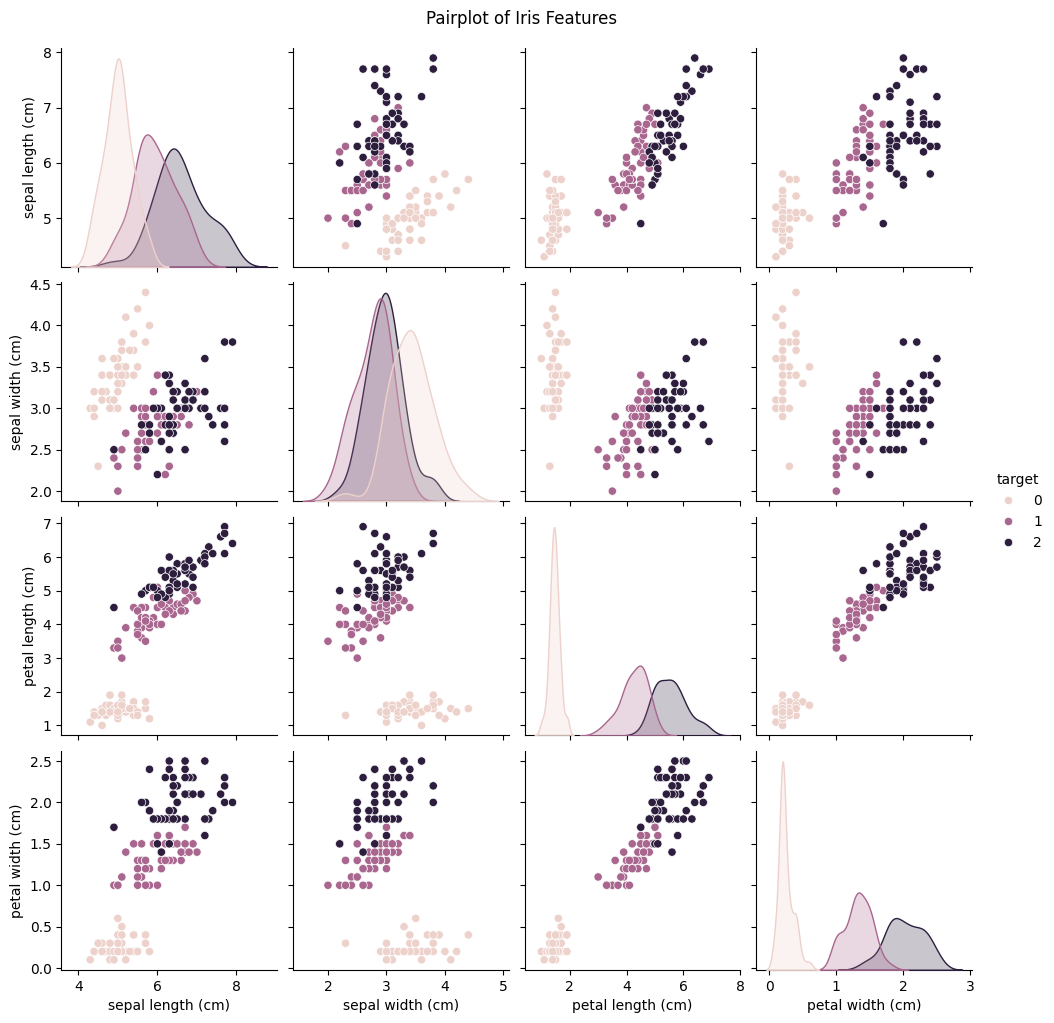

In [23]:
sns.pairplot(df, hue='target')
plt.suptitle("Pairplot of Iris Features", y=1.02)
plt.show()


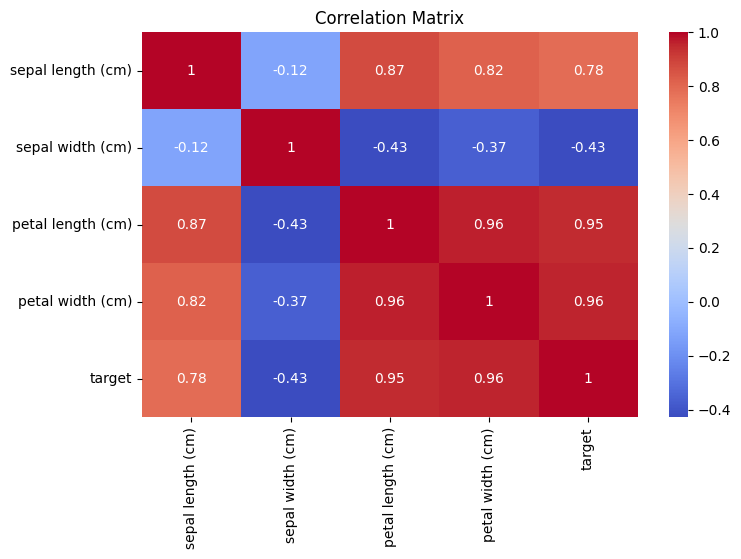

In [24]:
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


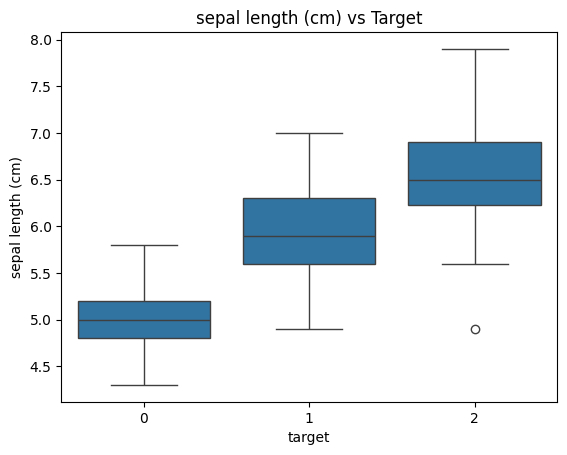

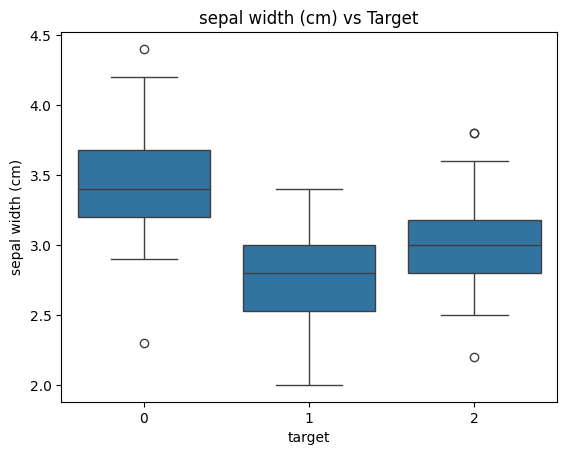

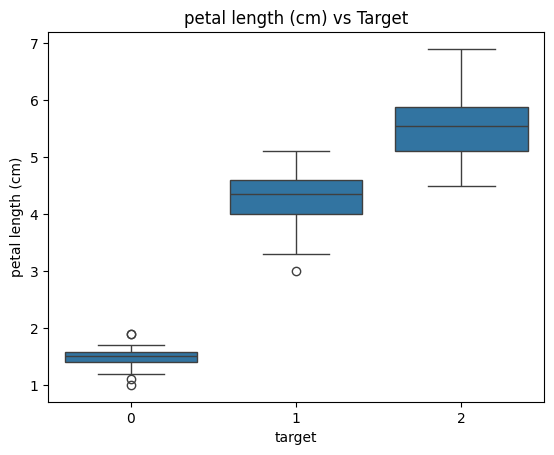

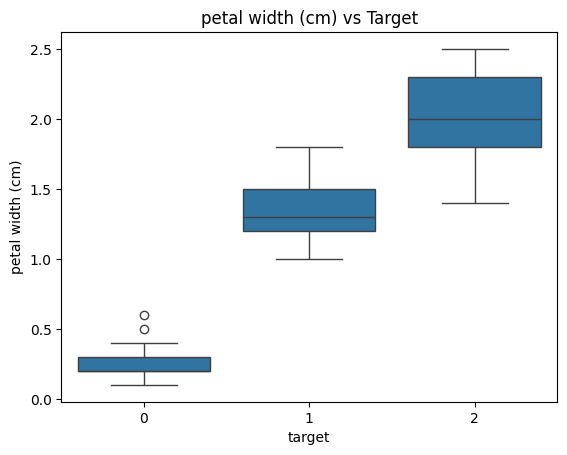

In [25]:
for column in df.columns[:-1]:
    plt.figure()
    sns.boxplot(x='target', y=column, data=df)
    plt.title(f"{column} vs Target")
    plt.show()


In [26]:
X = df.drop('target', axis=1)
y = df['target']


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [28]:
dt_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
dt_gini.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [29]:
y_pred_gini = dt_gini.predict(X_test)
print("Classification Report (Gini):\n", classification_report(y_test, y_pred_gini))


Classification Report (Gini):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



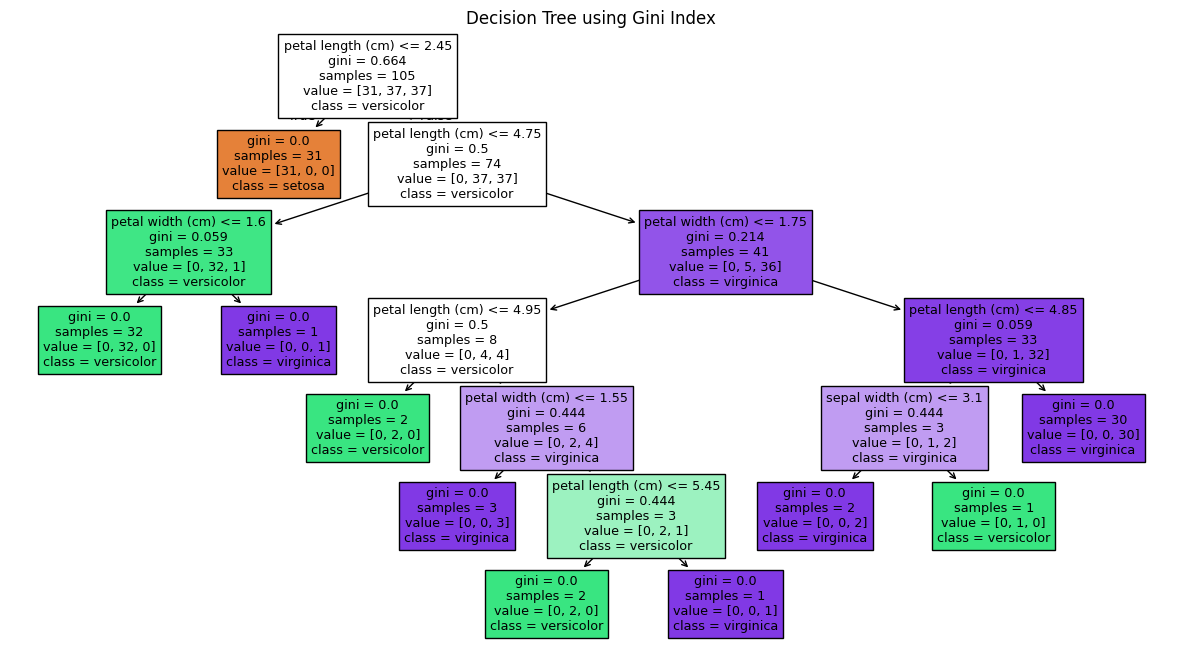

In [30]:
plt.figure(figsize=(15, 8))
plot_tree(dt_gini, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title("Decision Tree using Gini Index")
plt.show()


In [31]:
dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_entropy.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=42)

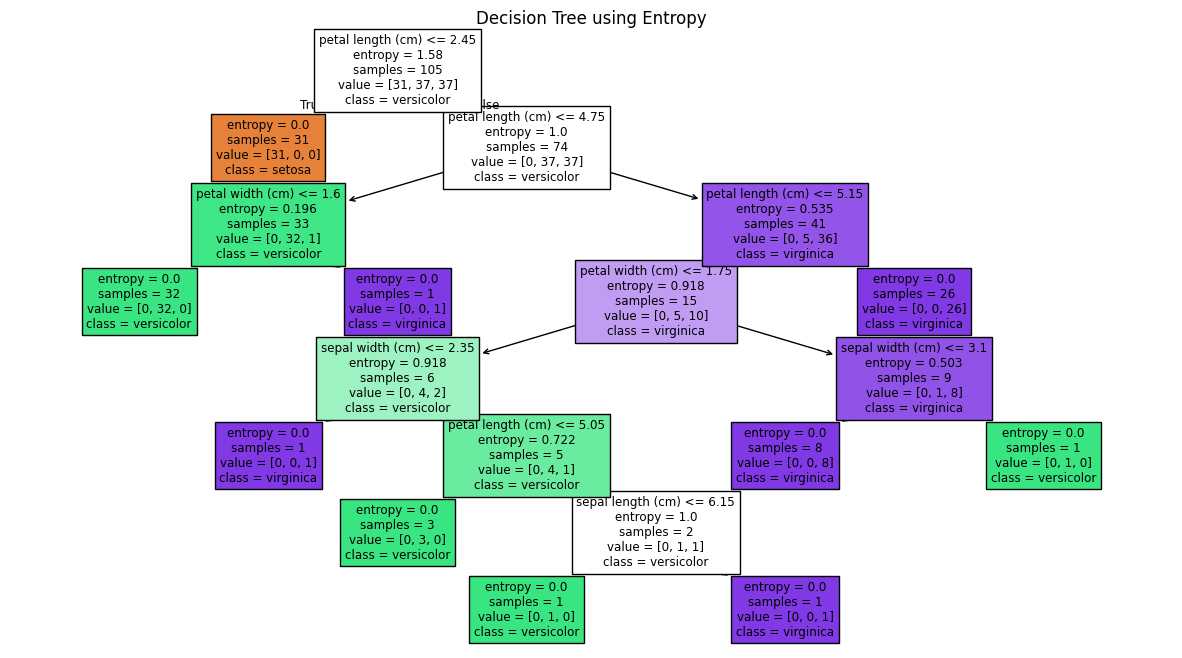

In [32]:
plt.figure(figsize=(15, 8))
plot_tree(dt_entropy, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title("Decision Tree using Entropy")
plt.show()


In [33]:
y_pred_entropy = dt_entropy.predict(X_test)
print("Classification Report (Entropy):\n", classification_report(y_test, y_pred_entropy))


Classification Report (Entropy):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.93      1.00      0.96        13
           2       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



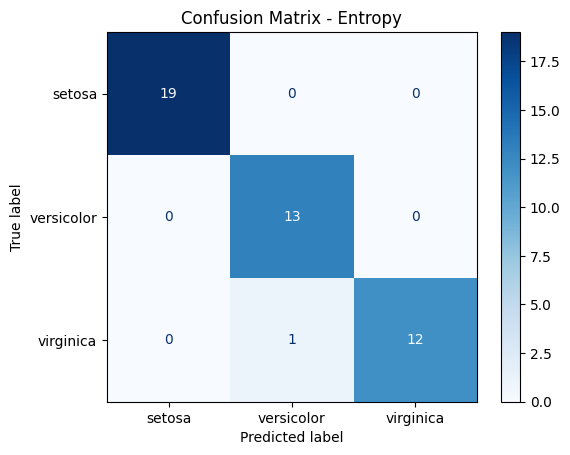

In [34]:
cm = confusion_matrix(y_test, y_pred_entropy)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Entropy")
plt.show()
